In [1]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=283da5f906d645de253a5b983d1da4a39c9ef258043685d5c44d263bfc6d9b33
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=4fcf9f4c4f4f3841e622e4bc920264e2905ddfc28fef9d547ee65f43674f2d34
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9b

In [6]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = sc.datasets.visium_sge(sample_id='Parent_Visium_Human_Glioblastoma')


  0%|          | 0.00/8.71M [00:00<?, ?B/s]

  0%|          | 0.00/19.5M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
data

AnnData object with n_obs × n_vars = 3468 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [7]:
data.var["mt"] = data.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(data, qc_vars=["mt"], inplace=True)

<ipython-input-9-c2acb8009eea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.obs["total_counts"], kde=False, ax=axs[0])
<ipython-input-9-c2acb8009eea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.obs["total_counts"][data.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1

<Axes: xlabel='n_genes_by_counts'>

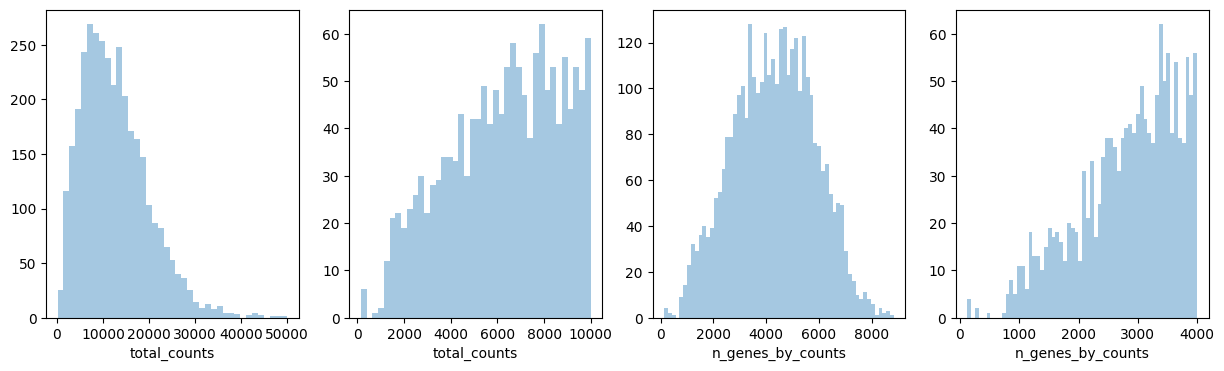

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(data.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(data.obs["total_counts"][data.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(data.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(data.obs["n_genes_by_counts"][data.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [12]:
sc.pp.filter_cells(data, min_counts=2000)
sc.pp.filter_cells(data, max_counts=20000)
data = data[data.obs["pct_counts_mt"] < 20]
print(f"Number of cells after MT filter: {data.n_obs}")
sc.pp.filter_genes(data, min_cells=10)

Number of cells after MT filter: 2870


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [13]:
data

AnnData object with n_obs × n_vars = 2870 × 18618
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'

In [15]:
sc.pp.normalize_total(data, inplace=True)
sc.pp.log1p(data)
sc.pp.highly_variable_genes(data, flavor="seurat", n_top_genes=200) #find higly variable genes

In [16]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.0 MB/s eta 0:00:00


In [19]:
sc.pp.pca(data)
sc.pp.neighbors(data)
sc.tl.umap(data)
sc.tl.leiden(data, key_added="clusters")

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


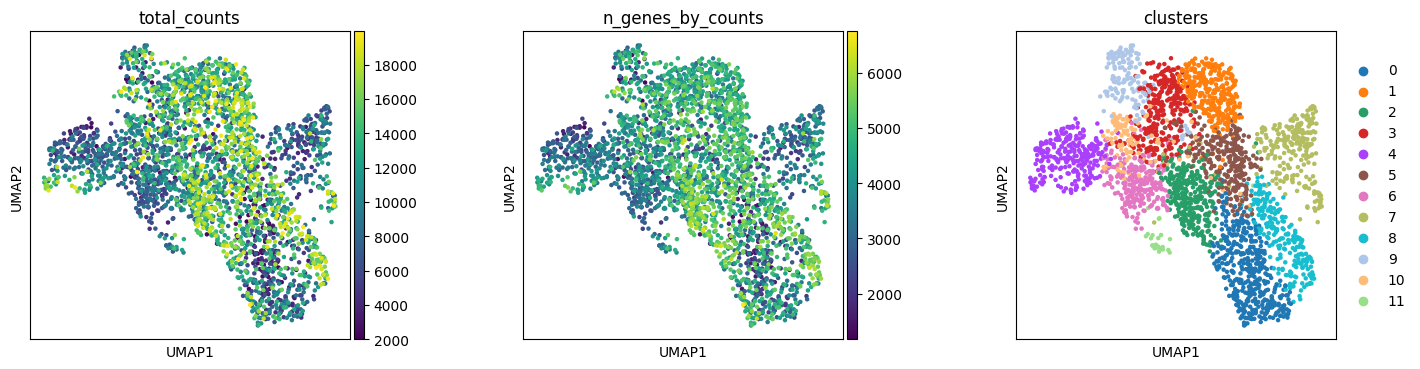

In [21]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(data, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

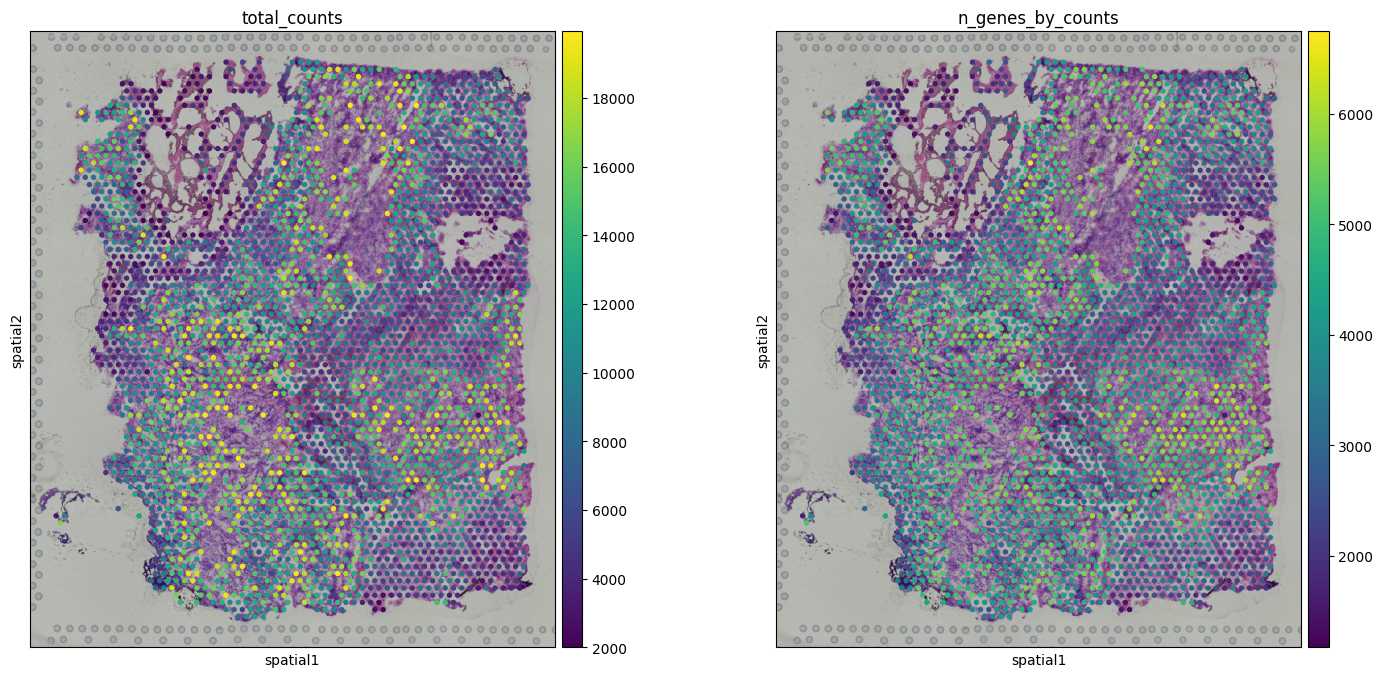

In [23]:

plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(data, img_key="hires", color=["total_counts", "n_genes_by_counts"])

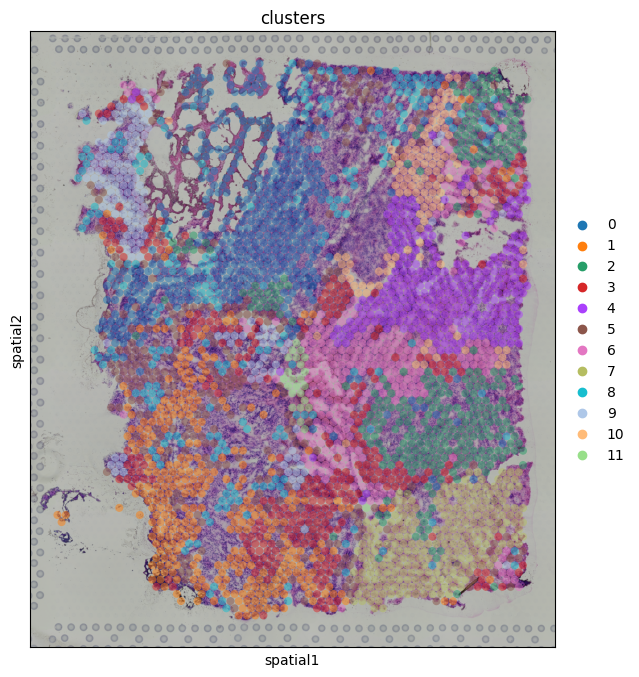

In [24]:
sc.pl.spatial(data, img_key="hires", color="clusters", size=1.5, alpha=0.5)

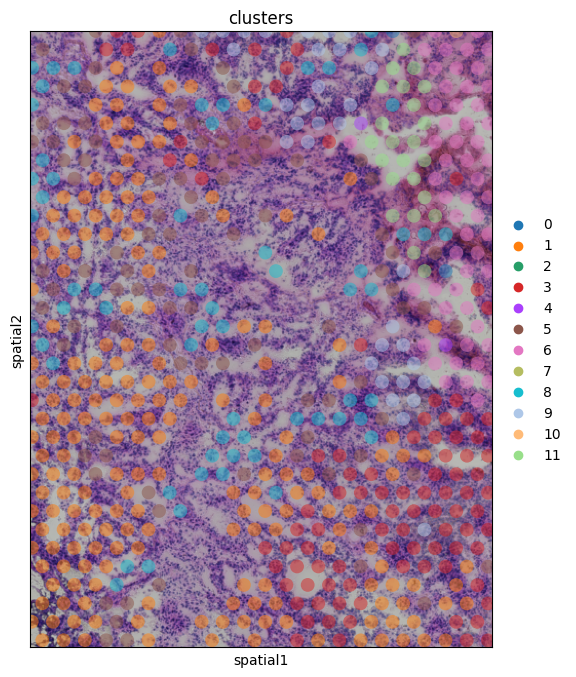

In [25]:
sc.pl.spatial(data, img_key="hires", color="clusters", crop_coord=[4000, 7000, 6000, 10000],  alpha=0.5, size=1)

In [26]:
data.var_names_make_unique()


categories: 0, 1, 2, etc.
var_group_labels: 1


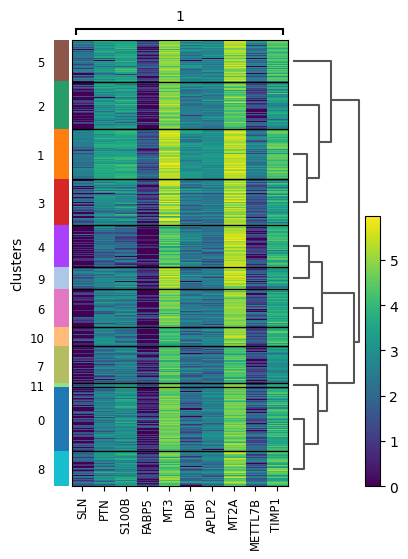

In [29]:
sc.tl.rank_genes_groups(data, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(data, groups="1", n_genes=10, groupby="clusters")

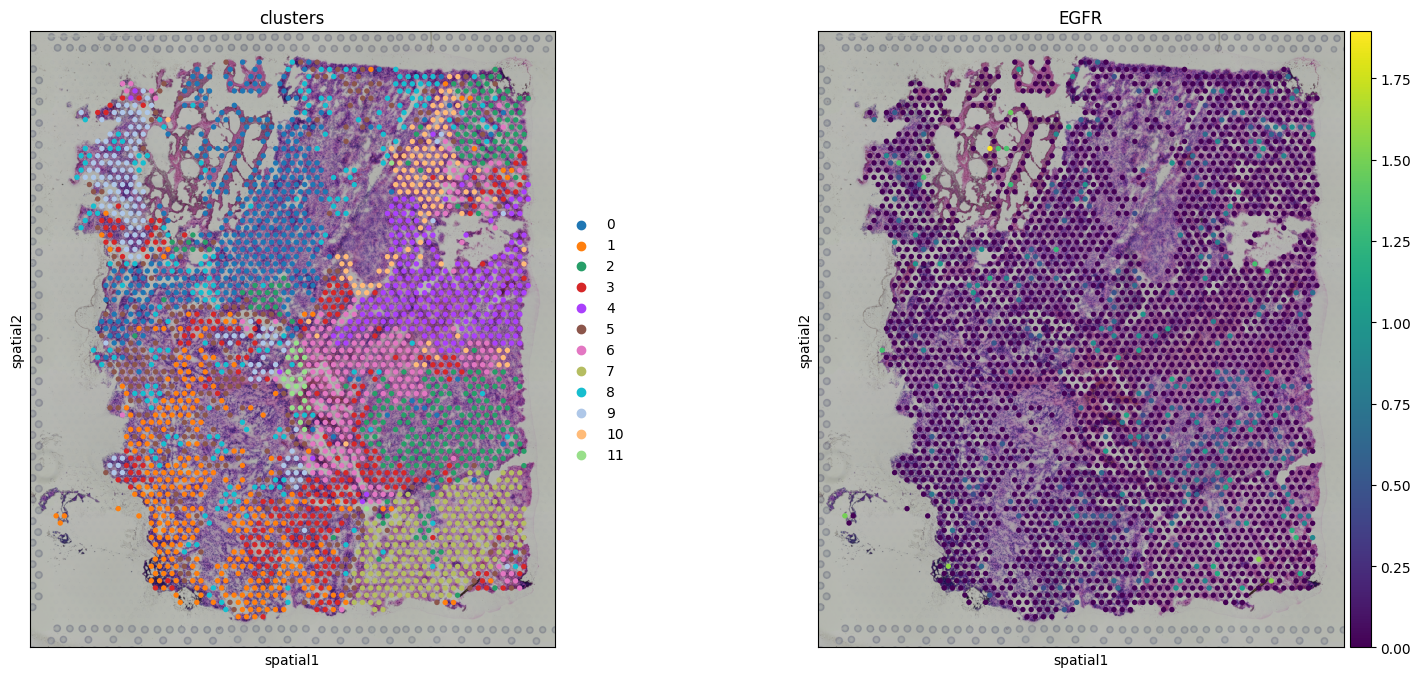

In [31]:
sc.pl.spatial(data, img_key="hires", color=["clusters", "EGFR"])

In [32]:
!pip install spatialde

  Preparing metadata (setup.py) ... done
  Created wheel for NaiveDE: filename=NaiveDE-1.2.0-py3-none-any.whl size=5688 sha256=e6fc63d10ef9ce97c3e92cc19c485c220a7ede3719d222152ab230090e8f6c72
  Stored in directory: /root/.cache/pip/wheels/d7/ab/bf/ade34a8389ad9ee6dc022c07e93b5fec533bdffb11ba1ee894
Successfully built NaiveDE


In [33]:
import SpatialDE

In [ ]:
counts = pd.DataFrame(data.X.todense(), columns=data.var_names, index=data.obs_names)
coord = pd.DataFrame(data.obsm['spatial'], columns=['x_coord', 'y_coord'], index=data.obs_names)
results = SpatialDE.run(coord, counts)    #IDENTIFY SPATIALLY VARIABLE GENES

/usr/local/lib/python3.10/dist-packages/SpatialDE/base.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
/usr/local/lib/python3.10/dist-packages/SpatialDE/base.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/18618 [00:00<?, ?it/s]

  0%|          | 0/18618 [00:00<?, ?it/s]

  0%|          | 0/18618 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/SpatialDE/base.py:178: RuntimeWarning: divide by zero encountered in scalar divide
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)


In [ ]:
results.index = results["g"]
data.var = pd.concat([data.var, results.loc[data.var.index.values, :]], axis=1)


In [ ]:
results.sort_values("qval").head(10) #QVAL IS PVAL AFTER CORRECTION OFR MULTIPLE TESTING

In [ ]:
sc.pl.spatial(data, img_key="hires", color=["SLC9A3R2", "COX20"], alpha=0.8)

In [ ]:
sc.pl.spatial(data, img_key="hires", color=["NKAIN1", "UBE2E2", "F13A1", "RNF149", "PLAUR"], alpha=0.8)